# Declaration of Originality

![image.png](attachment:image.png)

**TEMASEK POLYTECHNIC**
<br>**SCHOOL OF INFORMATICS & IT**
<br>**DIPLOMA IN INFORMATION TECHNOLOGY**
<br>**MACHINE LEARNING FOR DEVELOPERS (CAI2C08)**
<br>**AY2025/2026 OCTOBER SEMESTER**

**PROJECT PROGRAM CODES**
* Student Name (Matric Number)  : Foo Jing Heng Anson (2401482A)
* Tutorial Group                :  T07
* Tutor						    :  Ms Ester Goh
* Submission Date               : 11/02/26


**Declaration of Originality**
* I am the originator of this work and I have appropriately acknowledged all other original sources used as my references for this work.
* I understand that Plagiarism is the act of taking and using the whole or any part of another person’s work, including work generated by AI, and presenting it as my own.
* I understand that Plagiarism is an academic offence and if I am found to have committed or abetted the offence of plagiarism in relation to this submitted work, disciplinary action will be enforced.

# Libraries

In [1175]:
## Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 1. Business Understanding
Goal: Student depression is a increasing concern amongst schools and will negatively affect student's performance, well-being and even lead to undesirable consequences. Early identification of students at risk of depression allows instituitions to take action early and prevent tragedies from happening. This machine model aims to predict student's depression risk using various aspects such as pressure the student is facing, lifestyle, and academic related features.


# 2. Data Understanding

## 2.1 Load dataset

In [1176]:
## Read *.csv file into pandas DataFrame
FILE_PATH = "depression.csv"
# Load the dataset to understand its structure and identify relevant features
df = pd.read_csv(FILE_PATH);
df

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27896,140685,Female,27.0,Surat,Student,5.0,0.0,5.75,5.0,0.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27897,140686,Male,27.0,Ludhiana,Student,2.0,0.0,9.40,3.0,0.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27898,140689,Male,31.0,Faridabad,Student,3.0,0.0,6.61,4.0,0.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27899,140690,Female,18.0,Ludhiana,Student,5.0,0.0,6.88,2.0,0.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


In [1177]:
# Create a reproducible hold-out set (1 depressed, 1 not depressed)
RANDOM_STATE = 42

holdout_depressed = df[df['Depression'] == 1].sample(n=1, random_state=RANDOM_STATE)
holdout_not_depressed = df[df['Depression'] == 0].sample(n=1, random_state=RANDOM_STATE)

holdout_df = pd.concat([holdout_depressed, holdout_not_depressed])

# Remove hold-out samples from main dataset
df = df.drop(index=holdout_df.index)

# Optional: reset index for cleanliness
df = df.reset_index(drop=True)

# Preview hold-out (optional, safe)
holdout_df


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
24602,123970,Male,31.0,Kolkata,Student,5.0,0.0,5.60,1.0,0.0,'Less than 5 hours',Unhealthy,MBBS,Yes,2.0,1.0,Yes,1
23467,118259,Male,32.0,Srinagar,Student,3.0,0.0,9.72,5.0,0.0,'5-6 hours',Healthy,M.Ed,No,11.0,4.0,Yes,0


## 2.2 Summary Statistics

In [1178]:
## Display the first few rows of the dataset to understand its structure
df.head()

,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,2,Male,33.0,Visakhapatnam,Student,5.0,0.0,8.97,2.0,0.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,8,Female,24.0,Bangalore,Student,2.0,0.0,5.90,5.0,0.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,26,Male,31.0,Srinagar,Student,3.0,0.0,7.03,5.0,0.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,30,Female,28.0,Varanasi,Student,3.0,0.0,5.59,2.0,0.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,32,Female,25.0,Jaipur,Student,4.0,0.0,8.13,3.0,0.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0


Justification: df.head() is used to understand the struture of the data which helps me verify whether the data has loaded properly and help me detect early obvious issues with the data such as unexpected symbols.


In [1179]:
# Display dataset structure and data types
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27899 entries, 0 to 27898
Data columns (total 18 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   id                                     27899 non-null  int64  
 1   Gender                                 27899 non-null  object 
 2   Age                                    27899 non-null  float64
 3   City                                   27899 non-null  object 
 4   Profession                             27899 non-null  object 
 5   Academic Pressure                      27899 non-null  float64
 6   Work Pressure                          27899 non-null  float64
 7   CGPA                                   27899 non-null  float64
 8   Study Satisfaction                     27899 non-null  float64
 9   Job Satisfaction                       27899 non-null  float64
 10  Sleep Duration                         27899 non-null  object 
 11  Di

Justification: df.info() is used for me to understand the diffrent data types and the number of non-null values so that I can identify any invalid data types. 

Intepretation: I found that the "Financial Stress" feature has a wrong data type as it should be float64 similar to "Academic Pressure" and "Work Pressure".

In [1180]:
df.describe(include='all')


,id,Gender,Age,City,Profession,Academic Pressure,Work Pressure,CGPA,Study Satisfaction,Job Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
count,27899.000000,27899,27899.000000,27899,27899,27899.000000,27899.000000,27899.000000,27899.000000,27899.000000,27899,27899,27899,27899,27899.000000,27899,27899,27899.000000
unique,NaN,2,NaN,52,14,NaN,NaN,NaN,NaN,NaN,5,4,28,2,NaN,6,2,NaN
top,NaN,Male,NaN,Kalyan,Student,NaN,NaN,NaN,NaN,NaN,'Less than 5 hours',Unhealthy,'Class 12',Yes,NaN,5.0,No,NaN
freq,NaN,15545,NaN,1570,27868,NaN,NaN,NaN,NaN,NaN,8309,10316,6080,17655,NaN,6715,14398,NaN
mean,70438.516864,NaN,25.821893,NaN,NaN,3.141152,0.000430,7.656104,2.943833,0.000681,NaN,NaN,NaN,NaN,7.157031,NaN,NaN,0.585505
std,40640.359973,NaN,4.905626,NaN,NaN,1.381469,0.043994,1.470657,1.361091,0.044396,NaN,NaN,NaN,NaN,3.707575,NaN,NaN,0.492644
min,2.000000,NaN,18.000000,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,NaN,NaN,0.000000
25%,35036.500000,NaN,21.000000,NaN,NaN,2.000000,0.000000,6.290000,2.000000,0.000000,NaN,NaN,NaN,NaN,4.000000,NaN,NaN,0.000000
50%,70662.000000,NaN,25.000000,NaN,NaN,3.000000,0.000000,7.770000,3.000000,0.000000,NaN,NaN,NaN,NaN,8.000000,NaN,NaN,1.000000
75%,105812.000000,NaN,30.000000,NaN,NaN,4.000000,0.000000,8.920000,4.000000,0.000000,NaN,NaN,NaN,NaN,10.000000,NaN,NaN,1.000000


Justification: df.describe() is used to help me analyse the data and detect anomalies, any extreme values and ensure data quality. 

Intepretation: The "Age" feature has a max of 59 which is a potential anomaly because the dataset is mostly students. There are also 2 high-cardinity features "City" with 52 unqiue values and "Degree" with 28 unique values which should be considered for dropping as doing one-hot encoding will significantly increase dimentionality and increase the risk of overfitting. Featurss such as "Job Satisfaction" and "Work Pressure" have a median and upper quatile of 0 which indicates very low or no variance. The target variable "Depression" has a mean of 0.585499 which suggest that the dataset is slightly inbalanced with more positive cases of depression than negative.

In [1181]:
df['Financial Stress'].value_counts()


Financial Stress
5.0    6715
4.0    5774
3.0    5226
1.0    5120
2.0    5061
?         3
Name: count, dtype: int64

Justification: I used this to check for the different values the 'Financial stress' feature had. 'Financial Stress' feature had 3 invalid placeholders which affected its data type which was converted to objects.

In [1182]:
df['Financial Stress'] = pd.to_numeric(
    df['Financial Stress'],
    errors='coerce'
)

Justification: Converted all the values in the column to a number. If the value could not be converted, it will be converted to NaN (Not a number).


In [1183]:
# Check for missing values and display missing percentage
missing_summary = pd.DataFrame({
    "Missing Count": df.isnull().sum(),
    "Missing Percentage (%)": df.isnull().mean() * 100
})
missing_summary

,Missing Count,Missing Percentage (%)
id,0,0.000000
Gender,0,0.000000
Age,0,0.000000
City,0,0.000000
Profession,0,0.000000
Academic Pressure,0,0.000000
Work Pressure,0,0.000000
CGPA,0,0.000000
Study Satisfaction,0,0.000000
Job Satisfaction,0,0.000000


Justification: There are missing values in the "Financial Stress" column which needs to be processed to ensure data quality.

In [1184]:
df = df.dropna(subset=['Financial Stress'])
df['Financial Stress'].value_counts()

Financial Stress
5.0    6715
4.0    5774
3.0    5226
1.0    5120
2.0    5061
Name: count, dtype: int64

Justification: Since the missing values for "Financial Stress" feature is only 3 and the missing percentage is 0.010752%, the entries were removed rather than imputed. This method avoided adding artificial values into the column while having negligible impact on the data distribution of the feature and the overall dataset.

## 2.3 Data Visualization

### 2.3.1 Understanding distribution of data

### 2.3.1.1 Understanding distribution of target

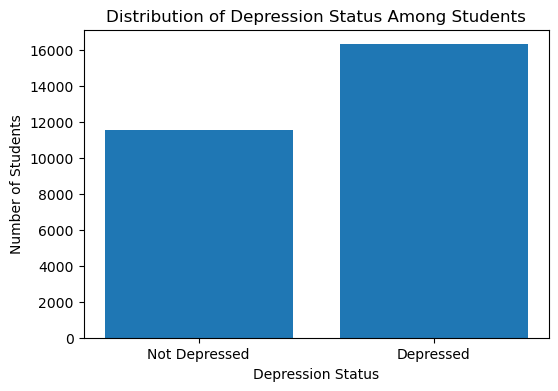

In [1185]:
# Understanding Distribution of the target (Depression)
counts = df['Depression'].value_counts().sort_index()

plt.figure(figsize=(6,4))
plt.bar(counts.index, counts.values)
plt.title("Distribution of Depression Status Among Students")
plt.xlabel("Depression Status")
plt.ylabel("Number of Students")
plt.xticks([0, 1], ["Not Depressed", "Depressed"])
plt.show()

Intepretation: The distribution of the target variable shows a slight class inbalance between depressed or not depressed  This inbalance in the classes indicates that there are more depressed students than not depressed students and if this data is used to train the model without addressing this class inbaalance, the model may become biased towards the majority class. This suggest that solely relying on accuracy metric may be misleading and therefore precision, recall and f1-score must be considered too as they account for the class inbalance. Recall is a metric that is important here as it focuses on the false negatives as identifying a depressed student in this context is very important.

### 2.3.1.2 Understanding distribution of features

Histogram and Boxplot are used to analyse the distribution of the numeric features

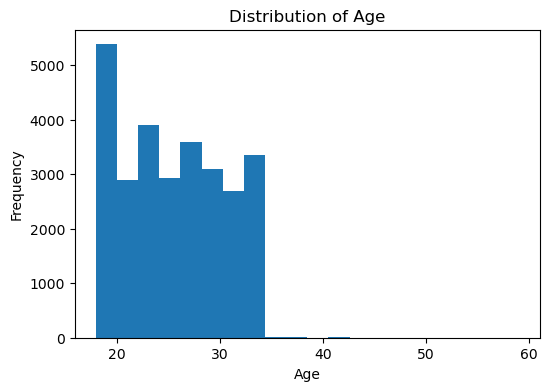

In [1186]:
## Age

plt.figure(figsize=(6,4))
plt.hist(df['Age'], bins=20)
plt.title("Distribution of Age")
plt.xlabel("Age")
plt.ylabel("Frequency")
plt.show()

Intepretation: The age feature shows a right-skewed distribution of the data points which reflects the predominantly younger students. The peak values of this feature are in the early 20s and the values start to decrease when entering and beyond the early 30s which suggest that older individuals are rare in this dataset therefore these values could be considered anomalies or outliers. Due to the skewed nature of the graph, mean-based assumptions may be inaccurate, and therefore median-based or other outlier detection such as Interquatile Quatile Range could be more useful for pre-processing the feature.

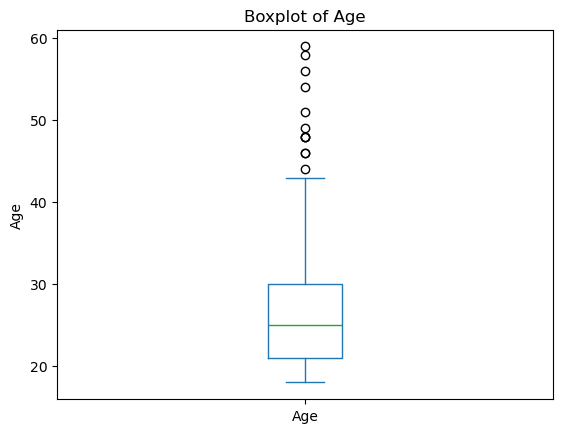

In [1187]:
## Age

df['Age'].plot(kind='box')
plt.title("Boxplot of Age")
plt.ylabel("Age")
plt.show()

intepretation: The boxplot shows that majority of the students fall in the younger age range, with a median in the mid-20s. Several upper outliers are observed, indicating that there are several older individuals within the dataset.The right-skewed distribution suggests potential influence on models sensitive to outliers, whcih will be considered subsequently for feature engineering.

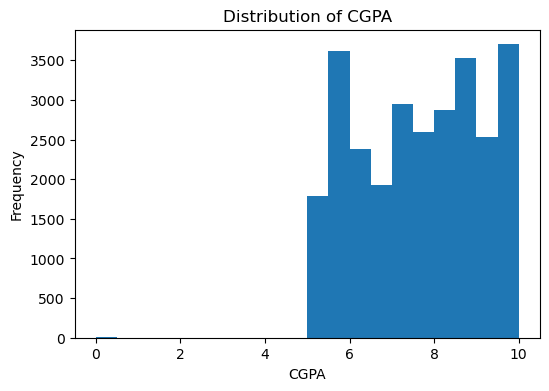

In [1188]:
## CGPA

plt.figure(figsize=(6,4))
plt.hist(df['CGPA'], bins=20)
plt.title("Distribution of CGPA")
plt.xlabel("CGPA")
plt.ylabel("Frequency")
plt.show()

Intepretation: This histogram shows a left-skewed distribution of the data points which is predominantly between the 5.0 to 10.0 CGPA marks. This indicates that most of the students have moderate to hugh academic performances. There is one obvious anomaly whcih is the CGPA point at 0 which is unrelistic given that CGPA can almost never be represented by 0. This unexpected CGPA value can negatively impact performance and should be removed from the dataset.

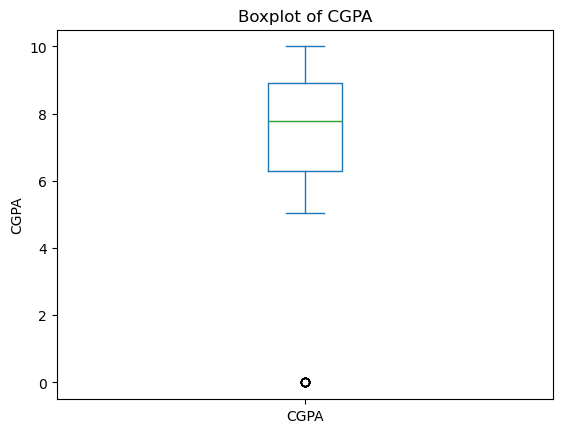

In [1189]:
## CGPA

df['CGPA'].plot(kind='box')
plt.title("Boxplot of CGPA")
plt.ylabel("CGPA")
plt.show()

Intepretation: The boxplot shows the spread of the data points, the median and the outliers of the CGPA feature. The median CGPA is positioned near the upper quatile which indicates that students typically have high academic performances. The spread of the data points suggests a reasonable spread of CGPA while remaining within the expected range. One obvious outlier is observed at near 0 CGPA whcih lies way below the lower whisker. Removing or handling this outlier is important before model training to prevent it from influencing the model results.

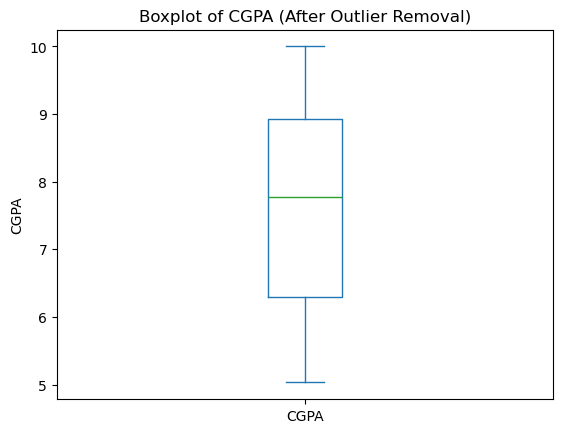

In [1190]:
## Removal of outlier

# Remove unrealistic CGPA values (e.g. CGPA = 0)
df = df[df['CGPA'] > 0]

df['CGPA'].plot(kind='box')
plt.title("Boxplot of CGPA (After Outlier Removal)")
plt.ylabel("CGPA")
plt.show()

Justification: After removing the unrealistic CGPA outlier, the boxplot shows a well-defined and consistent distribution of academic performance among students. The median CPGA lies aorund the middle to upper range, indicating that large amounts of students excel academically. The interquatile range for the boxplot is compact which suggest modrate variability for this feature. The absence of an extreme low outlier ensures that the remaining data points fall within a releastic and valid academic range, preventing any distortion during model training.

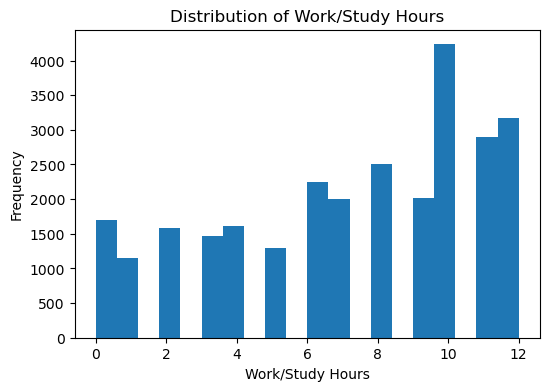

In [1191]:
## Work/Study Hours

plt.figure(figsize=(6,4))
plt.hist(df['Work/Study Hours'], bins=20)
plt.title("Distribution of Work/Study Hours")
plt.xlabel("Work/Study Hours")
plt.ylabel("Frequency")
plt.show()

Interpretation: This histogram shows the distribution of the feature "Work/Study Hours" which from the graph is right skewed. The data points represent the number of hours the individual spend on work or study and most of the data points are concentrated within the 8 to 12 hour mark. This shows the intensive work and study hours these individuals put in. In conclusion, the skewed nature of the data points suggest that this feature may need some tranforming and outlier handling before modelling. 

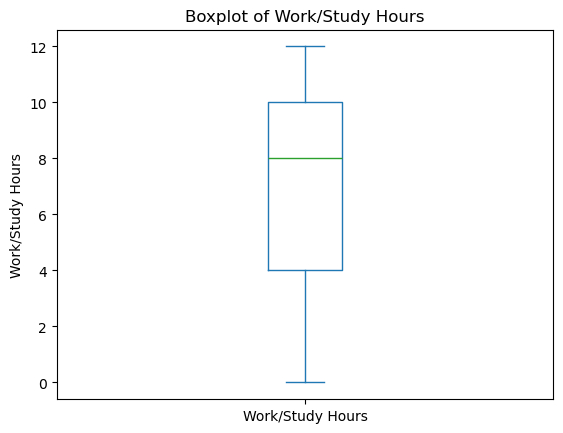

In [1192]:
## Work/Study Hours

df['Work/Study Hours'].plot(kind='box')
plt.title("Boxplot of Work/Study Hours")
plt.ylabel("Work/Study Hours")
plt.show()

Interpretation: This boxplot shows the distribution of the feature "Work/Study Hours" in terms of its spread and outliers. From the boxplot, the data is right-skewed but does not have outliers. The median of this feature is 8 hours which is how much time an individual spends on work or study. The interquatile range spans between 4 to 10 hours, showing moderate variability in the workload among the individuals in this dataset. No data points fall outside of the box plot and therefore there are no significant outliers. In conclusion, this feature does not need to be pre-processed with outlier removal and can be used for modelling without any or minimal processing. 

Bar Charts are used to analyse the distribution of categorical features

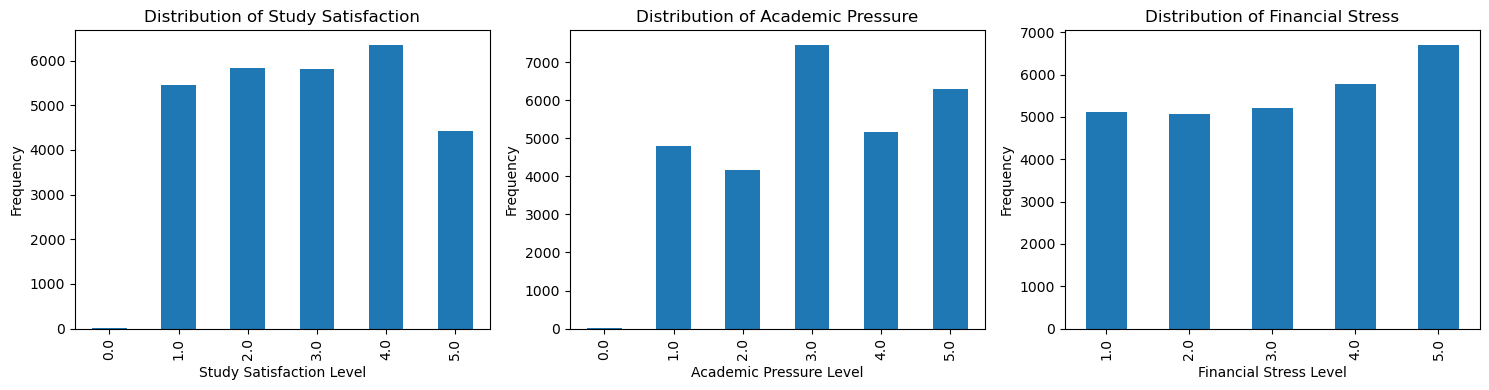

In [1193]:
plt.figure(figsize=(15, 4))

# Study Satisfaction
plt.subplot(1, 3, 1)
df['Study Satisfaction'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Study Satisfaction')
plt.xlabel('Study Satisfaction Level')
plt.ylabel('Frequency')

# Academic Pressure
plt.subplot(1, 3, 2)
df['Academic Pressure'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Academic Pressure')
plt.xlabel('Academic Pressure Level')
plt.ylabel('Frequency')

# Financial Stress
plt.subplot(1, 3, 3)
df['Financial Stress'].value_counts().sort_index().plot(kind='bar')
plt.title('Distribution of Financial Stress')
plt.xlabel('Financial Stress Level')
plt.ylabel('Frequency')

plt.tight_layout()
plt.show()


Intepretation: These three features were visualised side by side using bar charts because they are ordinal variables. Bar charts are the most suitable for ordinal features as they accurately display the frequency of each category without the continous numeric intervals. These three features are well spread and indicates sufficient variability in the dataset. The absense of any skewness with these three features suggests that these features can be used without any data pre-processing.

In [1194]:
df['Job Satisfaction'].value_counts()

Job Satisfaction
0.0    27885
3.0        1
2.0        1
Name: count, dtype: int64

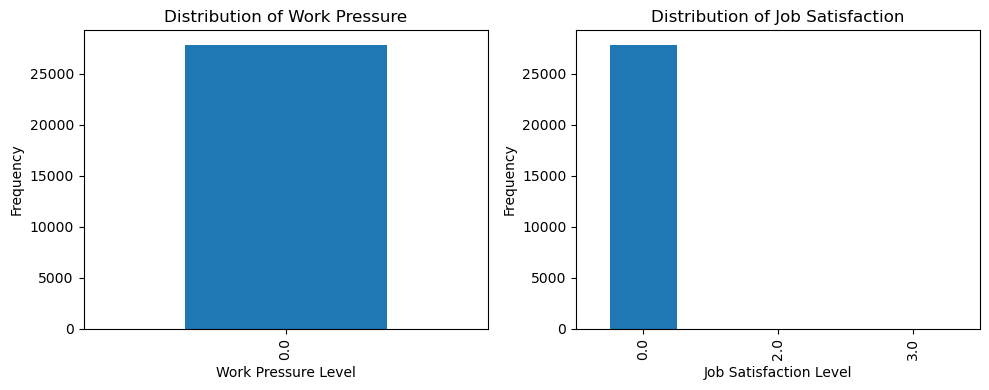

In [1195]:
plt.figure(figsize=(10,4))

# Work Pressure
plt.subplot(1,2,1)
df['Work Pressure'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Work Pressure")
plt.xlabel("Work Pressure Level")
plt.ylabel("Frequency")

# Job Satisfaction
plt.subplot(1,2,2)
df['Job Satisfaction'].value_counts().sort_index().plot(kind='bar')
plt.title("Distribution of Job Satisfaction")
plt.xlabel("Job Satisfaction Level")
plt.ylabel("Frequency")

plt.tight_layout()
plt.show()


Interpretation: These bar charts shows the distribution these two features and it is evident that both features' data points are heavily concentrated at the 0 mark, which suggests that the majority of students indicated that they have no work pressure or job satisfaction. Job satisfaction specifically have 1 data point for 2.0 and 1 data point for 3.0 while work pressure has none. This extreme skewness shown by the bar charts indicates low variance across the two features. These feature distributions suggest that most of the individuals in the dataset are not employed and therefore these features should be considered to drop as they can introduce noise and negatively affect model performance due to their low varability. 

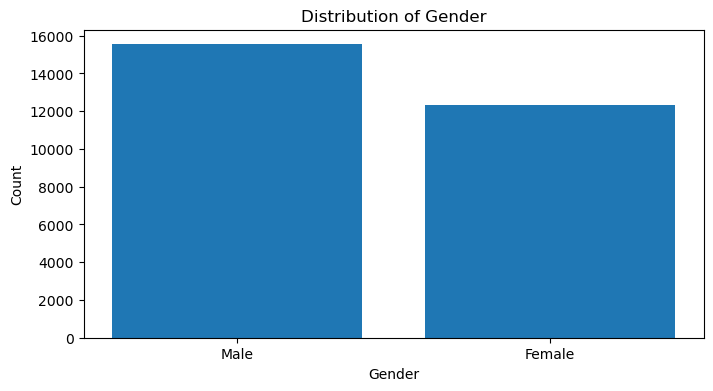

In [1196]:
counts = df['Gender'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

Intepretation: This bar chart shows the distribution of gender within the dataset. From the bar chart, I observed that the gender is slightly inbalanced with male being more than the female. This suggests that the data is skewed towards the male participants in this dataset and therefore may affect model learning if used as a predictive feature. The model may be more influenced by the majority class, negtively affecting the training of the model. However, the inbalance is not extreme and both categories are well represented. If the correct and appropriate metric is used to evaluate the model, it is still a viable feature for inclusion. 

In [1197]:
df['City'].describe()

count      27887
unique        52
top       Kalyan
freq        1570
Name: City, dtype: object

In [1198]:
df['City'].value_counts()

City
Kalyan                  1570
Srinagar                1371
Hyderabad               1339
Vasai-Virar             1290
Lucknow                 1154
Thane                   1139
Ludhiana                1111
Agra                    1094
Surat                   1078
Kolkata                 1064
Jaipur                  1036
Patna                   1007
Visakhapatnam            969
Pune                     967
Ahmedabad                949
Bhopal                   934
Chennai                  884
Meerut                   824
Rajkot                   815
Delhi                    768
Bangalore                767
Ghaziabad                745
Mumbai                   699
Vadodara                 692
Varanasi                 684
Nagpur                   651
Indore                   643
Kanpur                   609
Nashik                   547
Faridabad                461
Saanvi                     2
Bhavna                     2
City                       2
Harsha                     2
Kibara   

Intepretation: The feature City is analysed using .describe() instead of the bar chart due to its high cardinality. This lead to the bar chart having overlapping labels on the x-axis and hard to intepret using a bar chart. There are a total of 52 unique cities in this dataset and this high number of unique values can lead to high dimentionality when one-hot encoding this feature. This can introduce sparsity and cause overfitting during model training. Additonally, it was also analysed with value_counts which showed that a few cities within the dataset dominated and ultimately the city information does not align with our objective of predicting student's depression. therefore, this feature should be considered to be dropped during data cleaning.

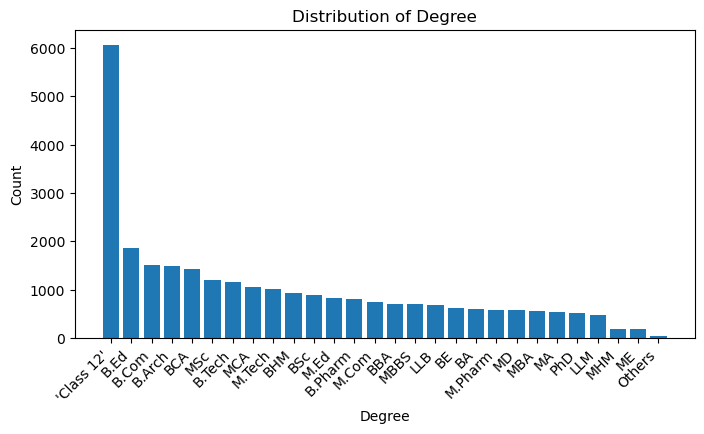

In [1199]:
counts = df['Degree'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Degree")
plt.xlabel("Degree")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Degree" in this dataset. The feature has a large number of unique categories with very uneven categories. One category which is 'Class 12' dominates this feature while the other degree types have samll number of data points which causes a very inbalanced and long-tailed distribution. This feature indicates that many of the individuals comes from diverse educational backgrounds, however the distribution is uneven with many of the categories being sparsely populated. This increase the risk of noise during modelling and significantly lowers the reliability of the model learning the patterns from this feature. "Degree" is also a high-cardinality categorical feature which will lead to high dimentionality and overfitting if directly used after one-hot encoding. This feature should be considered to be dropped during feature selection.    

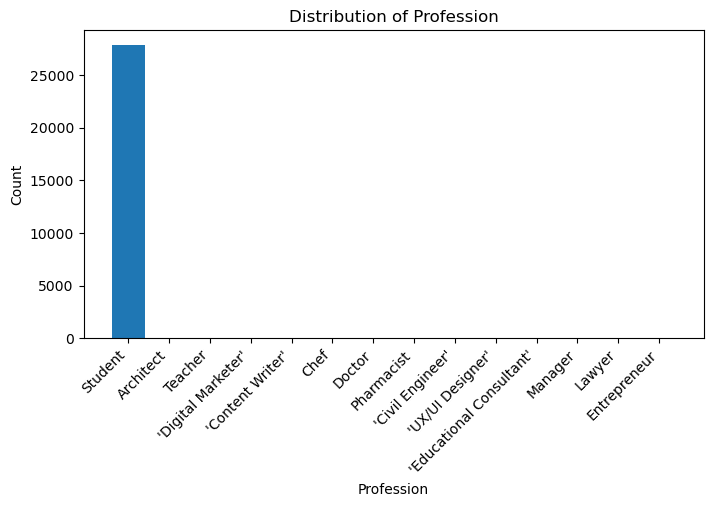

In [1200]:
counts = df['Profession'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Profession")
plt.xlabel("Profession")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Profession" in this dataset. From the bar chart, this feature shows severe class inbalance with the student category having the overwhelming number of datapoints comapared to the other categories. This distribution shows the extremely low variability in this feature and unlikely to provide any meaningful contribution during model training. Introducing this feature during modelling can also lead to sevral issues. Directly one-hot encoding this feature will lead to sparsity and will increase the model complexity without providing any benefit.

In [1201]:
df['Sleep Duration'].value_counts()

Sleep Duration
'Less than 5 hours'    8303
'7-8 hours'            7344
'5-6 hours'            6179
'More than 8 hours'    6043
Others                   18
Name: count, dtype: int64

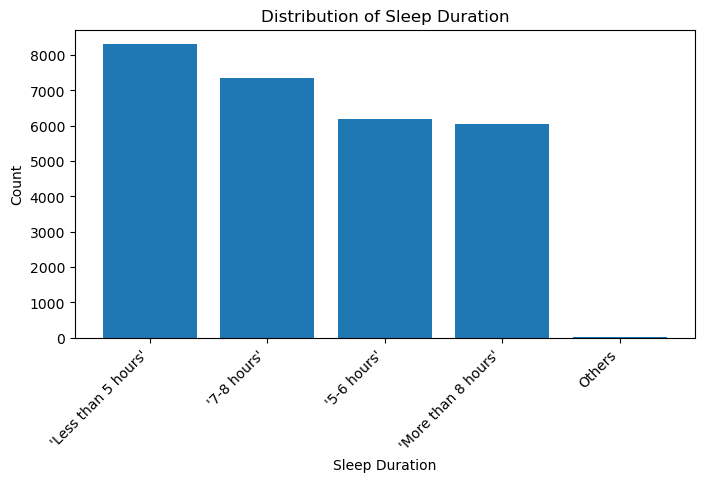

In [1202]:
counts = df['Sleep Duration'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Sleep Duration")
plt.xlabel("Sleep Duration")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution of the feature "Sleep Duration" which is a categorical ordinal feature. The most frequent category is “Less than 5 hours”, followed by “7–8 hours”, “5–6 hours”, and “More than 8 hours” while the "Others" category has very few data points of only 18. The presence of meaningful data points across all categories indicated that there is adequate variability across all the categories, making it useful to use during modelling. Sleep duration is an important predictor as sleep deprivation is associated with depression symptoms. However, the "Others" category is very sparse and may need to be processed or merged to aviod introducing noice into the model which will be considered during feature engineering stage.

In [1203]:
df['Dietary Habits'].value_counts()

Dietary Habits
Unhealthy    10312
Moderate      9917
Healthy       7646
Others          12
Name: count, dtype: int64

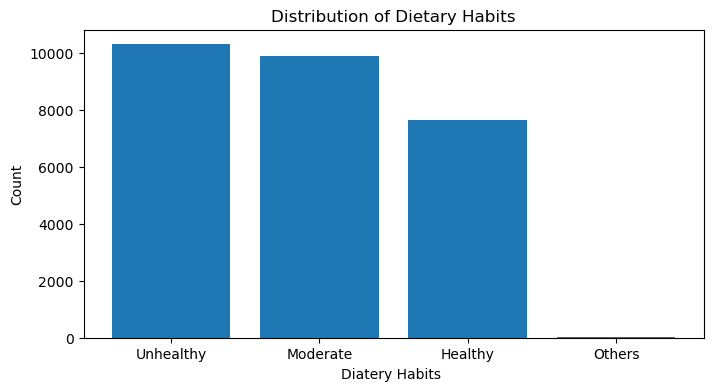

In [1204]:
counts = df['Dietary Habits'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Dietary Habits")
plt.xlabel("Diatery Habits ")
plt.ylabel("Count")
plt.show()

 Intepretation: The bar chart shows the distribution of the feature "Dietary habits" in this dataset. The most frequent category is “Unhealthy”, followed by “Moderate”, “Healthy”, and "Others" category specifically has only 12 data points which is very few compared to the rest of the categories. The presence of meaningful points across the categories indicates that the feature has sufficient variability to be introduce meaningful and informative influence during modeling. Dietary Habits may be a relevant predictor for depression as eating patterns are associated with depression and mental health. However, the "Others" category is very sparse and may need to be processed or merged to aviod introducing noice into the model.

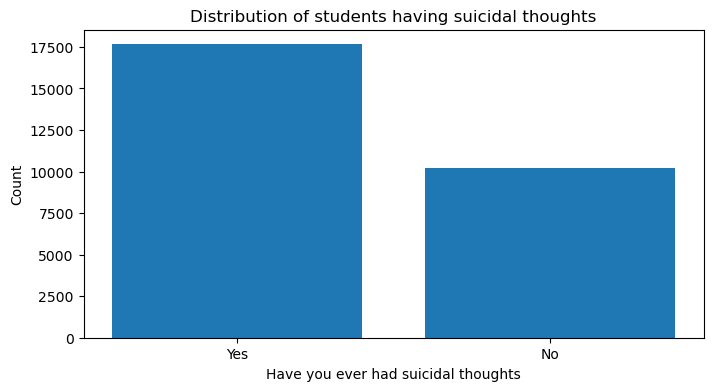

In [1205]:
counts = df['Have you ever had suicidal thoughts ?'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of students having suicidal thoughts")
plt.xlabel("Have you ever had suicidal thoughts")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shows the distribution for the feature "Have you ever had suicidal thoughts ?" for the dataset. This feature is a binary categorical feature with two valuse either Yes or No. The distribution suggests that more students has sucidal thoughts compared to those who have not. This feature has high relevance to the target variable and therefore a strong predictor for Depression. However this feature should be used with caution or even in consideration to drop as due to the high risk of data leak by proxy. This feature is very relevant to depression and may act as a proxy for the target variable. This may inflate the model's performance and reduce the applicability of this model in the real-world.

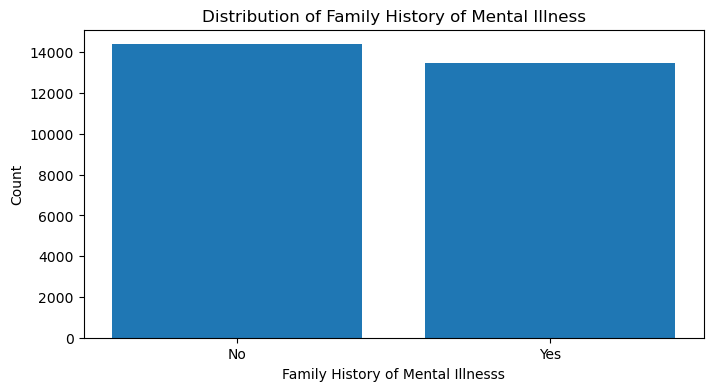

In [1206]:
counts = df['Family History of Mental Illness'].value_counts()

plt.figure(figsize=(8,4))
plt.bar(counts.index.astype(str), counts.values)
plt.title("Distribution of Family History of Mental Illness")
plt.xlabel("Family History of Mental Illnesss")
plt.ylabel("Count")
plt.show()

Intepretation: The bar chart shoes the distribution of the feature "Family History of Mental Illness" which is a binary categorical feature. The distribution between Yes and No is balanced with the absence of family history of metal illness being slightly higher. This suggests good variability within the data and will be useful for the model to learn the patterns of the feature without being bias to one outcome. Family History of Mental Illness is a risk factor associated with mental health and depression, therefore this feature will be useful during modelling.

### 2.3.2 Understanding relationship between variables

Numeric Vs Target Variable

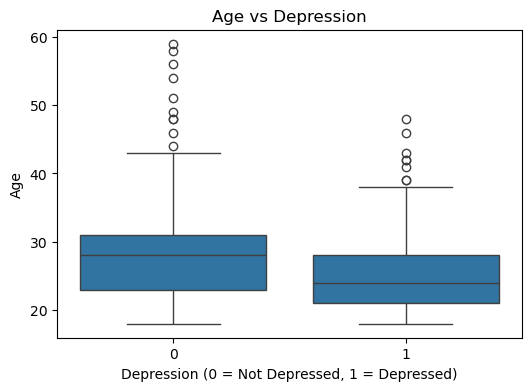

In [1207]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Age', data=df)
plt.title('Age vs Depression')
plt.xlabel('Depression (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('Age')
plt.show()


Intepretation: The boxplot compares the distribution of Age feature compared to the target variable (non-depressed (0) and depressed (1) students). The median age of the students in the depressed group is lower than the one in the non-depressed group, indicating that the younger individuals are more represented with the ones that is experiencing depression. Both groups show significant overlap in the interquatile range, suggesting that age is not a strong determining factor. However, the non-depressed group of individuals have a wider spread and more outliers, while the depressed group have less outliers and more concentrated within a narrower age range. This further suggests that there is a weak correlation between the age feature and the target variable and therefore should not be used as a strong predictor of the target variable.

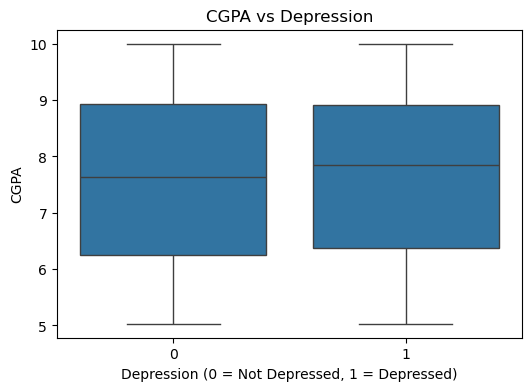

In [1208]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='CGPA', data=df)
plt.title('CGPA vs Depression')
plt.xlabel('Depression (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('CGPA')
plt.show()

Intepretation: The boxplot compares the distribution of "CGPA" feature compared to the target variable (non-depressed (0) and depressed (1) students). The median CGPA for both groups are very similar and their interquatile range largely overlaps. This indicates that the feature does not differ substantially from depressed and non-depressed individuals in this dataset. Overall, this heavily overlap in interquatile range andsimlar medians suggest that this feature is not a strong determining factor when prediciting the target variable. 

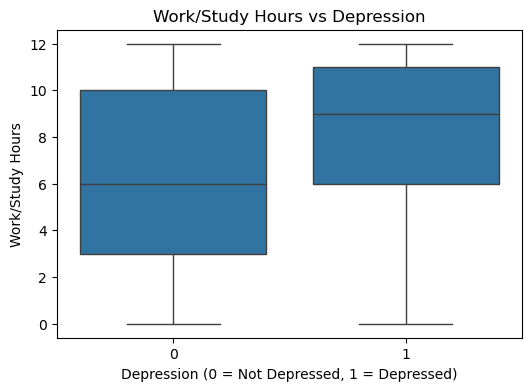

In [1209]:
plt.figure(figsize=(6,4))
sns.boxplot(x='Depression', y='Work/Study Hours', data=df)
plt.title('Work/Study Hours vs Depression')
plt.xlabel('Depression (0 = Not Depressed, 1 = Depressed)')
plt.ylabel('Work/Study Hours')
plt.show()

Intepretation: The boxplot compares the distribution of the "Work/Study Hours" feature and the target variable (non-depressed (0) and depressed (1) students). Overall, there is a positive relationship between the feature and the taret variable which means that the depressed group tend to spend more hours on work/study then the non-depressed group. This can be seen by a higher median work/study hours for the depressed group compared to the non-depressed group. The interquartile range (IQR) for the depressed group is higher in values, indicating that the middle 50% of depressed individuals generally study or work longer hours. In comparison, the non-depressed group shows a wider spread especially towards lower hours, suggesting greater variability and more individuals with shorter work/study hours. This feature shows clear seperation between the diffrent classes and thus is a strong predictor for the target variable.

Categorical Vs Target Variable 

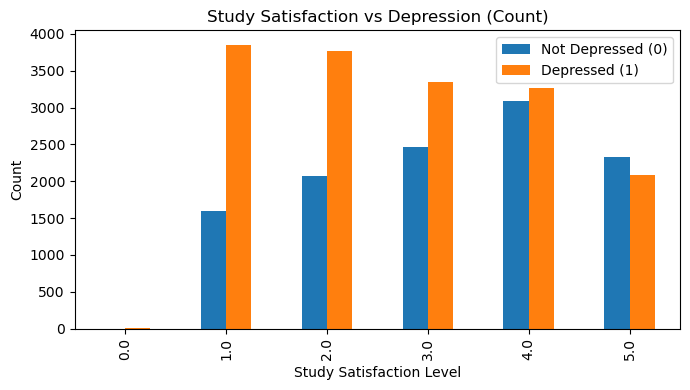

In [1210]:
ct = pd.crosstab(df['Study Satisfaction'], df['Depression'])

ct.plot(kind='bar', figsize=(7,4))
plt.title("Study Satisfaction vs Depression (Count)")
plt.xlabel("Study Satisfaction Level")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows the absolute number of students in each study satisfaction level, comapred and sepearated by the target variable(depression). Across most satisfaction levels (1 to 4), the number of depressed students is higher than non-depressed students. However, this observation is influenced by the overall class imbalance in the dataset, where depressed individuals form a larger portion of the sample. At study satisfaction level (5), the difference between the two groups becomes smaller, suggesting more non-depressed students is slighly higher than depressed students. Although this plot is useful for understanding the distribution of the data points, it does not accurately reflect the strength of the relationship between study satisfaction and depression.

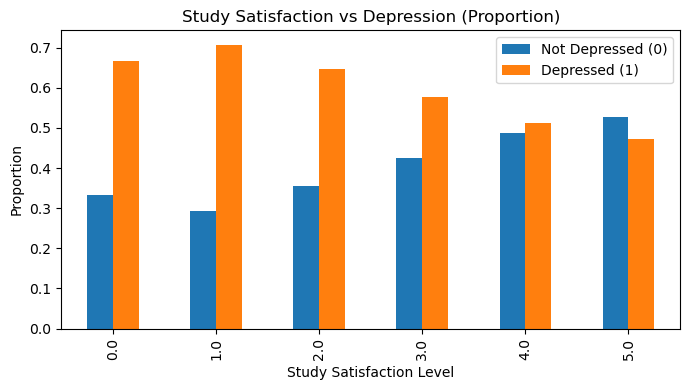

In [1211]:
ct_prop = pd.crosstab(df['Study Satisfaction'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Study Satisfaction vs Depression (Proportion)")
plt.xlabel("Study Satisfaction Level")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The proportion-based grouped bar chart provides a normalized comparison where the imbalanced class of the depressed and non-depressed individuals are not affecting the graphs and a clear trend can be seen. At lower study satisfaction levels (0–2), the proportion of depressed students is significantly higher than that of non-depressed students. As study satisfaction increases, the proportion of depressed individuals steadily decreases, while the proportion of non-depressed individuals increases. This indicates an inverse relationship between study satisfaction and depression where students with higher satisfaction in their studies are less likely to be depressed. The trend across the satisfaction levels suggests that study satisfaction is meaningfully associated with the target variable.

Model implication: Study Satisfaction is an ordinal categorical feature that is hasa strong predictive strength. The consistent change in depression proportions across satisfaction levels suggests that this feature contains useful trends and patterns rather than noise. Therefore, it should be used for model training. Because the feature is ordinal, it is appropriate to encode it using ordinal encoding rather than one-hot encoding, allowing models to learn the ordered relationship.

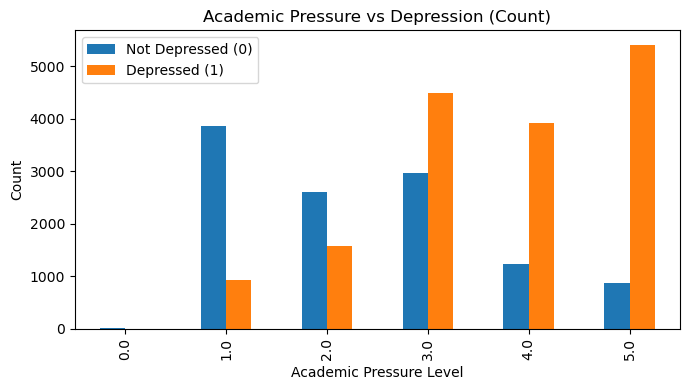

In [1212]:
ct = pd.crosstab(df['Academic Pressure'], df['Depression'])

ct.plot(kind='bar', figsize=(7,4))
plt.title("Academic Pressure vs Depression (Count)")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows that as academic pressure levels increases, the number of depressed students increases, while the number of non-depressed students decreases. At lower academic pressure levels (0–1), non-depressed students are more than depessed students, whereas at higher levels (4–5), depressed students forms the majority while the non-depressed students are significantly less. However, because this plot reflects raw counts, it is influenced by the overall class imbalance in the dataset. As such, it is useful for understanding how many students fall into each category, but it does not fully show the strength of the relationship with depression.

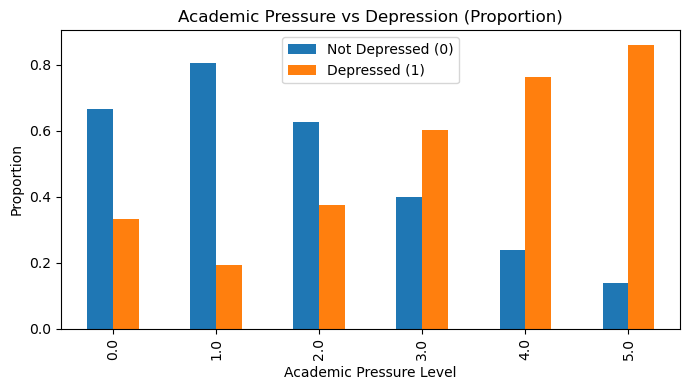

In [1213]:
ct_prop = pd.crosstab(df['Academic Pressure'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Academic Pressure vs Depression (Proportion)")
plt.xlabel("Academic Pressure Level")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The proportion-based grouped bar chart provides a normalized comparison where the imbalanced class of the depressed and non-depressed individuals are not affecting the graphs and it reveals a clear and monotonic trend. At low academic pressure levels (0-2), a larger proportion of students are not depressed compared to the depressed students. As academic pressure increases to levels (3-5), the proportion of depressed students increase significantly, exceeding 60% at level 3 and reaching over 80% at the highest pressure level(5). This indicates a strong positive correlation between academic pressure and depression. The consistent increase across the pressure levels suggests that academic pressure is not only correlated with depression, but that higher pressure substantially increases the likelihood of a student being depressed.

Model Implication: Academic Pressure is a ordinal feature with strong predictive strength. The clear separation of depression proportions across pressure levels indicates that this feature contains high-quality trends and patterns for model training. Therefore, it should be retained for model training. Given its ordinal nature, ordinal encoding is appropriate, allowing models to learn the ordinal significance.

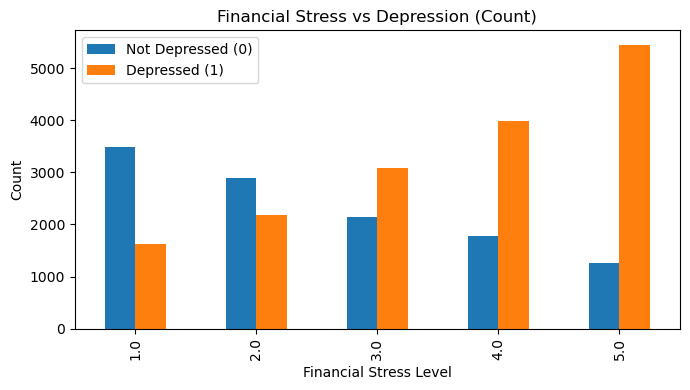

In [1214]:
ct = pd.crosstab(df['Financial Stress'], df['Depression'])

ct.plot(kind='bar', figsize=(7,4))
plt.title("Financial Stress vs Depression (Count)")
plt.xlabel("Financial Stress Level")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows that as financial stress levels increase, the number of depressed students increase, while the number of non-depressed students steadily decreases. At lower financial stress levels (1-2), non-depressed students are significantly more prevalent than depressed students. However, at higher stress levels (3–5), depressed students is the majority. While this plot indicates a potential relationship, it is influenced by the overall class imbalance in the dataset and therefore does not fully represent the likelihood of depression within each stress level.

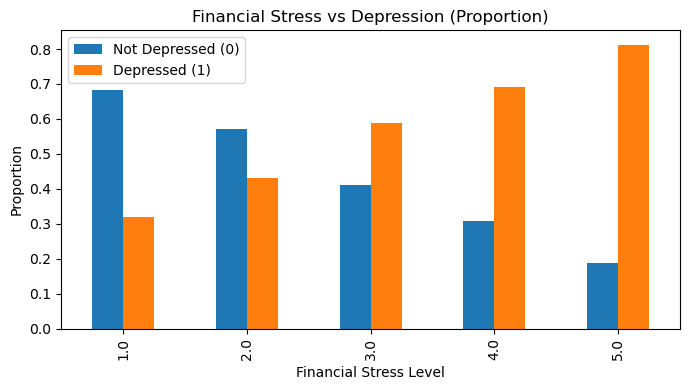

In [1215]:
ct_prop = pd.crosstab(df['Financial Stress'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Financial Stress vs Depression (Proportion)")
plt.xlabel("Financial Stress Level")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The proportion-based grouped bar chart shows a clear trend of the data. At low financial stress levels (0-2), the majority of students are not depressed. As financial stress levels increases to level (3-5), the proportion of depressed students increases sharply, exceeding 60% at level 3 and reaching over 80% at the highest stress level. This demonstrates a strong positive correlation between financial stress and depression. The monotonic increase across the financial stress levels indicates that higher financial stress increase the likelihood of depression, even after normalising for class imbalance.

Model Implication: Financial Stress is a highly informative ordinal feature with strong predictive strength. The clear separation in depression proportions across stress levels suggests that this feature contains significant trends for classification and not noise to the model. Therefore, it should be retained formodel training. Given its ordinal nature, ordinal encoding is appropriate, allowing models to capture the increasing risk pattern.

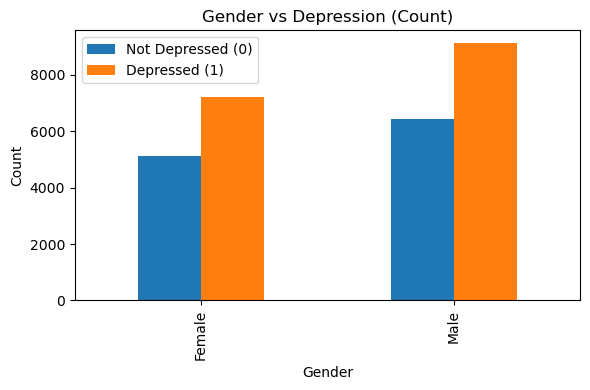

In [1216]:
ct = pd.crosstab(df['Gender'], df['Depression'])

ct.plot(kind='bar', figsize=(6,4))
plt.title("Gender vs Depression (Count)")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows that both male and female students have a higher number of depressed cases than non-depressed cases. Males seems to have a larger number of depressed students compared to females. However, this observation is influenced by the overall distribution of gender in the dataset, where males are of a larger portion of the dataset. As such, the count plot reflects dataset composition rather than a strong gender-specific effect.

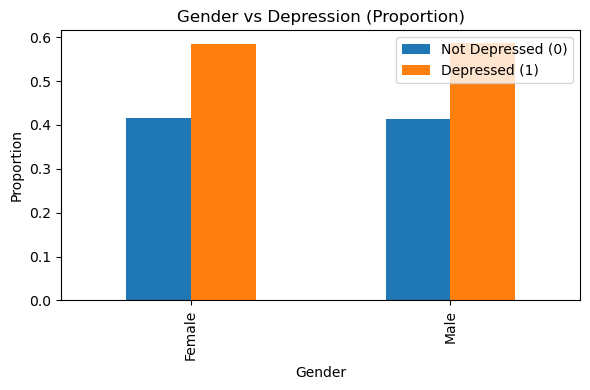

In [1217]:
ct_prop = pd.crosstab(df['Gender'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(6,4))
plt.title("Gender vs Depression (Proportion)")
plt.xlabel("Gender")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Implementation: The proportion-based grouped bar chart provides a normalized comparison and shows that the proportion of depressed students is very similar across both genders. Both male and female groups have nearly the same divide between depressed and non-depressed individuals, with no significant diffrence in terms of propotion. This suggests that gender alone does not strongly influence the likelihood of depression in this dataset. Any differences observed in the count plot are primarily due to differences in size of feature and distribution rather than a relationship with the target variable.

Model implication: The feature gender appears to be a weak predictor of depression. There is no meaningful differences in depression proportions across genders suggests that this feature contains limited predictive power. While gender can be retained, it is unlikely to significantly improve model performance on its own.Since gender is a categorical variable, it may be encoded one-hot encoding, but its contribution to feature importance is expected to be low. Therefore, it should not be prioritised over stronger ordinal features such as academic pressure or financial stress.

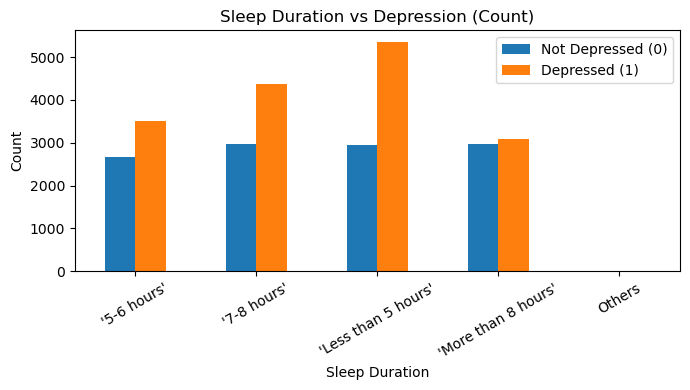

In [1218]:
ct = pd.crosstab(df['Sleep Duration'], df['Depression'])

ct.plot(kind='bar', figsize=(7,4))
plt.title("Sleep Duration vs Depression (Count)")
plt.xlabel("Sleep Duration")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Imtepretation: The count-based grouped bar chart shows that students who sleep less than 5 hours and 5–6 hours have noticeably higher numbers of depressed individuals compared to non-depressed individuals. In comparison, categories such as more than 8 hours show a more balanced distribution between depressed and non-depressed individuals. However, since the sleep duration categories are not even, absolute counts alone may be influenced by how common each sleep category is in the dataset.

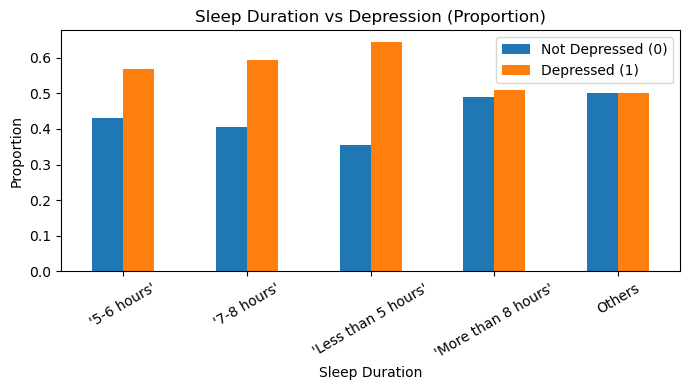

In [1219]:
ct_prop = pd.crosstab(df['Sleep Duration'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Sleep Duration vs Depression (Proportion)")
plt.xlabel("Sleep Duration")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


Intepretation: The proportion-based plot reveals a clearer trend within the data. Individual that sleeps less than 5 hours shows the highest proportion of depression, followed by those sleeping 5–6 hours and 7–8 hours. As sleep duration increases, the proportion of depressed students decreases, with the lowest depression proportions observed among students sleeping more than 8 hours. This suggests a negative relationship between sleep duration and depression, where insufficient sleep is associated with a higher likelihood of depression.

Model implication: Sleep duration appears to be a strong predictive factor for depression. The monotonic trend observed by the proptioned-based plot shows that the feature contain meaningful trends and not noise to the model. The sleep duration therefore should be retained as a feature for modelling. This is an ordinal categorical feature and therefore should be considered to use ordinal encoding, clearly reflecting the increasing sleep levels.

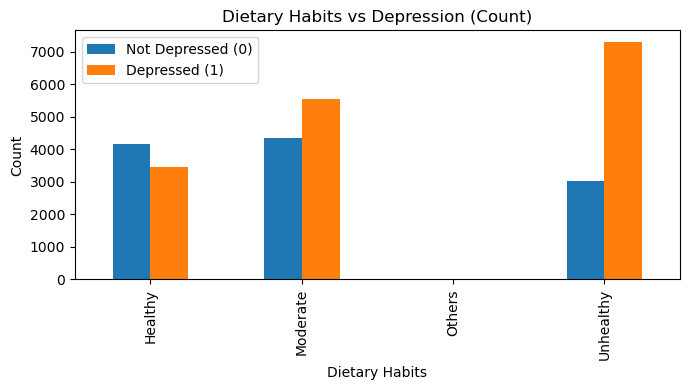

In [1220]:
ct = pd.crosstab(df['Dietary Habits'], df['Depression'])

ct.plot(kind='bar', figsize=(7,4))
plt.title("Dietary Habits vs Depression (Count)")
plt.xlabel("Dietary Habits")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows that students with unhealthy dietary habits have a noticeably higher number of depressed individuals compared to non-depressed individuals. In comparison, individuals with healthy or moderate dietary shows the depressed individuals decrease while the non-dpressed individuals increase. However, since the dietary habit categories are not evenly distributed in the dataset, absolute counts alone may be influenced by the size of each category rather than the actual relationship with depression.

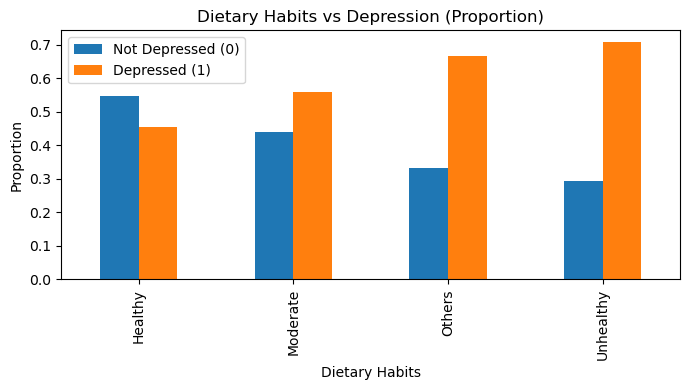

In [1221]:
ct_prop = pd.crosstab(df['Dietary Habits'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Dietary Habits vs Depression (Proportion)")
plt.xlabel("Dietary Habits")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The proportion-based plot provides clearer trend ot the data observed. Individuals with unhealthy dietary habits shows the highest proportion of depression, followed by those with moderate habits, while individuals with healthy diets show the lowest proportion of depression. This trend of depressed individuals increasing across dietary categories suggests a meaningful relationship where poorer dietary habits are associated with a higher likelihood of depression. The others category provide very little insight into the relation ot depression and is avery small sample size. The propotion for this category is the same more depressed individuals than non-depressed but this is not accurate due to the small sample size. Therefore, it should be processed or removed as it may introduce noise into the model.

Model implications: Dietary habits shows to be a strong predictive feature for depression, as the proportion-based analysis reveals a clear and monotonic trend. Since this feature captures lifestyle-related behavior that may influence mental health, it should be retained for modelling. As dietary habits represent an ordered categorical variable, using ordinal encoding may help the model better learn the underlying relationship with depression.

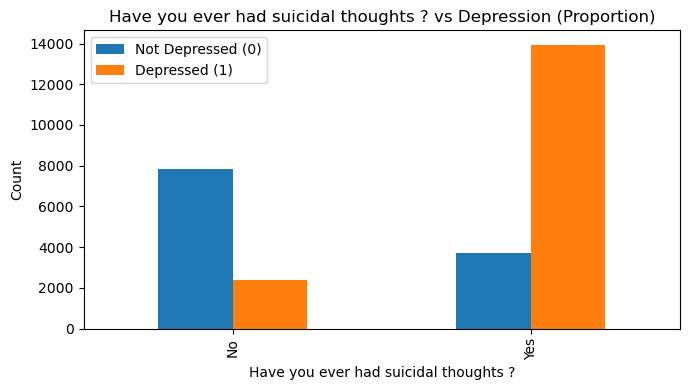

In [1222]:
ct_prop = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'])

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Have you ever had suicidal thoughts ? vs Depression (Proportion)")
plt.xlabel("Have you ever had suicidal thoughts ?")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()

Intepretation: The grouped bar chart shows a very strong separation between the two categories. Individuals who reported having suicidal thoughts are overwhelmingly classified as depressed, while those who reported no such thoughts are predominantly non-depressed. This is a concern as it may lead to data leakage by proxy as it seems to have a direct relationship between the feature and the target variable.

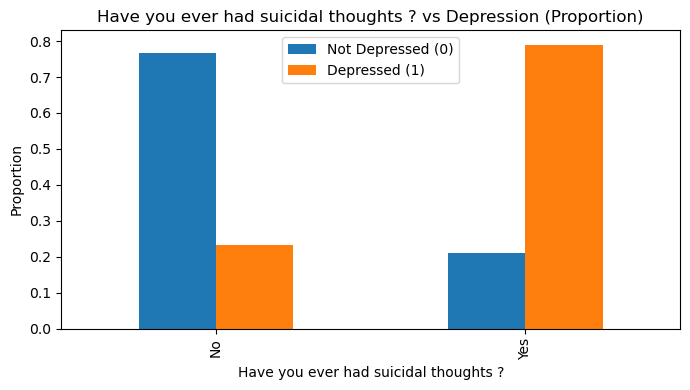

In [1223]:
ct_prop = pd.crosstab(df['Have you ever had suicidal thoughts ?'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(7,4))
plt.title("Have you ever had suicidal thoughts ? vs Depression (Proportion)")
plt.xlabel("Have you ever had suicidal thoughts ?")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()

Intepretation: This trend is even more clearer when using the proportion-based bar chart where the propotion of depressed individuals is very high among those who answered "Yes" for having sucidal thoughts compared to a much lower proportion among those who answered "No". This shows a direct relationship between this feature and the target variable.

Model implications: Although this feature shows very strong predictive power, it raises the concern about data leakage by proxy. The feature is directly related to the definition of depression and may represent an outcome-related symptom rather than an independent predictor. Including it in the model could artificially inflate performance and reduce the model’s real-world usefulness, especially if the business goal is early risk prediction of depression among students. Therefore, this feature maybe excluded from the model during feature selection to avoid inaccuracies.

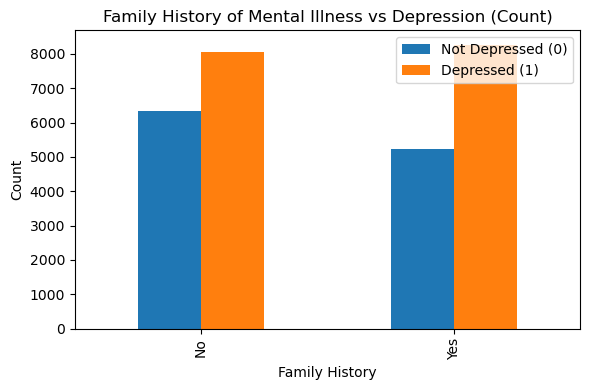

In [1224]:
ct = pd.crosstab(df['Family History of Mental Illness'], df['Depression'])

ct.plot(kind='bar', figsize=(6,4))
plt.title("Family History of Mental Illness vs Depression (Count)")
plt.xlabel("Family History")
plt.ylabel("Count")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The count-based grouped bar chart shows that individuals with a family history of mental illness have a noticeably higher number of depressed cases compared to non-depressed cases, whereas individuals without a family history show a more of a balanced distribution. However, since the overall number of respondents in each group differs, absolute counts alone may effect and not show the actual trend or relationship between family history and depression.

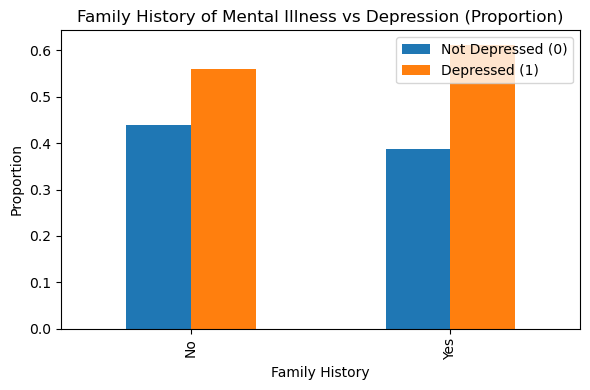

In [1225]:
ct_prop = pd.crosstab(df['Family History of Mental Illness'], df['Depression'], normalize='index')

ct_prop.plot(kind='bar', figsize=(6,4))
plt.title("Family History of Mental Illness vs Depression (Proportion)")
plt.xlabel("Family History")
plt.ylabel("Proportion")
plt.legend(["Not Depressed (0)", "Depressed (1)"])
plt.tight_layout()
plt.show()


Intepretation: The proportion-based chart provides a clearer comparison by normalizing the data within each family history category. It shows that individuals with a family history of mental illness have a higher proportion of depression compared to those without such a history, indicating a meaningful relationship between family mental health background and depression status.

Model implications: Family history of mental illness appears to be a strong categorical predictor of depression. The consistent difference observed in the proportion-based analysis suggests that this feature carries useful predictive trends rather than just noise to the model. As a binary categorical feature, it should be retained for modelling and encoded appropriately using one-hot encoding. Including this feature may help the model capture underlying factors of family history affecting the target variable.

Features Vs Features (Numeric)

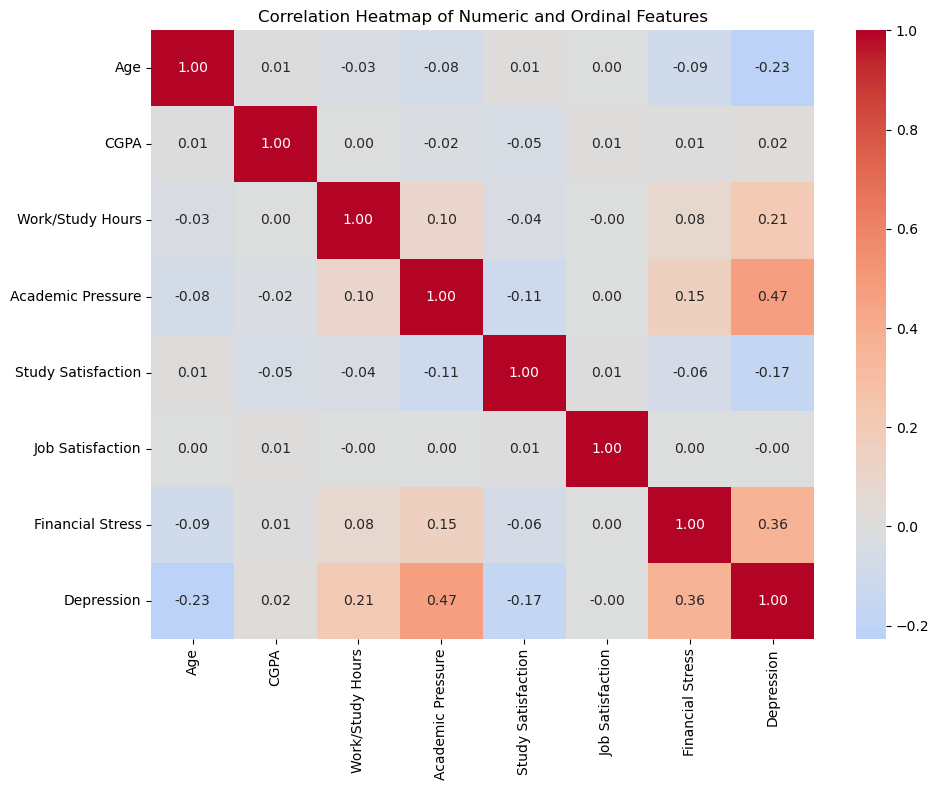

In [1226]:
corr_features = [
    'Age',
    'CGPA',
    'Work/Study Hours',
    'Academic Pressure',
    'Study Satisfaction',
    'Job Satisfaction',
    'Financial Stress',
    'Depression'
]


corr_matrix = df[corr_features].corr(method='pearson')

plt.figure(figsize=(10,8))
sns.heatmap(
    corr_matrix,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation Heatmap of Numeric and Ordinal Features")
plt.tight_layout()
plt.show()

(Feature Vs Feature) Intepretation:  The correlation heatmap was used to analyse both feature–feature correlation and also between features and the target variable (Depression). This heatmap suppors the identification of multicollinearity among the predictors while also providing insights into which features are more strongly correlated to depression.

Feature–Feature Correlation (Multicollinearity Assessment)

Overall, the heatmap shows that most of the feature–feature correlations are weak, with correlation coefficients close to zero. No pair of features exhibits a strong positive or negative correlation, indicating a low risk of multicollinearity within the dataset. This suggests that the feature capture important information on the different aspect of the student's life such as academic, personal and financial rather than just having reductant information that can result in noise for the model.

For example, CGPA shows near-zero correlation with most other features, indicating that academic performance is largely independent of stress, satisfaction, and workload-related features in this dataset. Similarly, Age has weak correlations with other predictors, suggesting that age does not strongly influence the other features.

Some mild positive relationships are observed within the featres, such as between Work/Study Hours and Academic Pressure, which is a reasonable relationship as increased workload may contribute to higher academic stress. However, these relationships remain weak and do not have any problem in terms of redundancy.

Overall, the lack of strong feature–feature correlations supports the inclusion of multiple predictors without the need for dimensionality reduction through feature engineering or other methods. 

(Feature Vs Target) Intepretation: When looking at the correlations with the target variable Depression, a few meaningful trends and patterns appear. The strongest positive correlation is observed between Academic Pressure and depression which is at 0.47, which suggests a moderate correlation between them. This suggests that higher academic pressure is linked to an increased likelihood of depression, which indicates that academic is an important factor to student's mental health.

Financial Stress similarly shows a moderate positive correlation with depression which isat 0.36, suggesting that financial struggles may negatively affect mental health. This indicates the relevance of financial aspects in depression.

A weaker positive correlation is seen between Work/Study Hours and depression which is at 0.21, indicating that increased workload may be related to higher depression levels, although the effect is less obvious and strong compared to academic and financial pressure.

On the other hand, Study Satisfaction shows a negative correlation with depression which is at −0.17, suggesting that students who are more satisfied with their studies tend to report lower levels of depression. Age also shows a negative correlation which is at −0.23, suggesting that younger students may be more vulnerable to depression than older individuals within the dataset.

CGPA and Job Satisfaction display near-zero correlations with depression, suggesting little to no linear relationship with the target variable. This suggests that academic performance and job-related satisfaction are not strong direct predictors of depression in this context.

# 3. Data Preparation

Data preparation involves dropping of irrelevant and unsuitable columns, spliting the features and target variable into X and y and encoding the categorical data before model training

## 3.1 Data Cleaning

In [1227]:
## Drop irrelevant columns

df_clean = df.copy()

cols_to_drop = [
    'id',
    'Work Pressure',
    'City',
    'Profession',
    'Job Satisfaction'
]

df_clean = df_clean.drop(columns=cols_to_drop, errors='ignore')
df_clean



,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,'Class 12',Yes,7.0,1.0,Yes,0
27895,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27896,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27897,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,'Class 12',Yes,10.0,5.0,No,1


Justification: Several columns were removed during pre-processing as some were non-informative and have no variance, high-cardinality, or unsuitable for data modelling. The id column was dropped as it only serves as a unique identifier and offers no predictive value to the model. The column "City" was removed due to its high cardinality, which would increase the dimensionality of the dataset without providing meaningful predictive trends. 'Work Pressure', 'Profession' and 'Job Satisfaction' was excluded as it did not have any variance and showed very weak correlation with the target variable during exploratory data analysis. Overall, removing these features helps reduce noise, improve model generalisation, and enhance interpretability.

In [1228]:
df_clean['Degree'] = df_clean['Degree'].str.replace("'", "", regex=False).str.strip()
df_clean

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness,Depression
0,Male,33.0,5.0,8.97,2.0,'5-6 hours',Healthy,B.Pharm,Yes,3.0,1.0,No,1
1,Female,24.0,2.0,5.90,5.0,'5-6 hours',Moderate,BSc,No,3.0,2.0,Yes,0
2,Male,31.0,3.0,7.03,5.0,'Less than 5 hours',Healthy,BA,No,9.0,1.0,Yes,0
3,Female,28.0,3.0,5.59,2.0,'7-8 hours',Moderate,BCA,Yes,4.0,5.0,Yes,1
4,Female,25.0,4.0,8.13,3.0,'5-6 hours',Moderate,M.Tech,Yes,1.0,1.0,No,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Female,27.0,5.0,5.75,5.0,'5-6 hours',Unhealthy,Class 12,Yes,7.0,1.0,Yes,0
27895,Male,27.0,2.0,9.40,3.0,'Less than 5 hours',Healthy,MSc,No,0.0,3.0,Yes,0
27896,Male,31.0,3.0,6.61,4.0,'5-6 hours',Unhealthy,MD,No,12.0,2.0,No,0
27897,Female,18.0,5.0,6.88,2.0,'Less than 5 hours',Healthy,Class 12,Yes,10.0,5.0,No,1


Justification: Used to remove and clean '' and whitespaces from the column Degree for data standardisation

In [1229]:
# Split features and target variable into X and Y

X = df_clean.drop(columns=['Depression'])
y = df_clean['Depression']

In [1230]:
from sklearn.preprocessing import OrdinalEncoder


X['Sleep Duration'] = X['Sleep Duration'].str.replace("'", "", regex=False)

X['Sleep Duration'] = X['Sleep Duration'].replace('Others', np.nan)


# Impute missing values using mode

X['Sleep Duration'] = X['Sleep Duration'].fillna(
    X['Sleep Duration'].mode()[0]
)
sleep_order = [
    'Less than 5 hours',
    '5-6 hours',
    '7-8 hours',
    'More than 8 hours'
]
sleep_encoder = OrdinalEncoder(categories=[sleep_order])

# Apply ordinal encoding
X['Sleep Duration'] = sleep_encoder.fit_transform(
    X[['Sleep Duration']]
)


X

,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,5.0,8.97,2.0,1.0,Healthy,B.Pharm,Yes,3.0,1.0,No
1,Female,24.0,2.0,5.90,5.0,1.0,Moderate,BSc,No,3.0,2.0,Yes
2,Male,31.0,3.0,7.03,5.0,0.0,Healthy,BA,No,9.0,1.0,Yes
3,Female,28.0,3.0,5.59,2.0,2.0,Moderate,BCA,Yes,4.0,5.0,Yes
4,Female,25.0,4.0,8.13,3.0,1.0,Moderate,M.Tech,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Female,27.0,5.0,5.75,5.0,1.0,Unhealthy,Class 12,Yes,7.0,1.0,Yes
27895,Male,27.0,2.0,9.40,3.0,0.0,Healthy,MSc,No,0.0,3.0,Yes
27896,Male,31.0,3.0,6.61,4.0,1.0,Unhealthy,MD,No,12.0,2.0,No
27897,Female,18.0,5.0,6.88,2.0,0.0,Healthy,Class 12,Yes,10.0,5.0,No


Justification: The Sleep Duration feature was used as an ordinal categorical variable due to the natural ordering of sleep intervals. Before encoding the feature, formatting artifacts was removed to keep consistent category representation. The category "Others' was rare within the data and also highly ambigious as it does not have a meaningful ordinal level and therefore it was treated as a missing value. Missing values were imputed using mode, which is appropriate for ordinal categorical data as mean and median is for numeric variables. Ordinal encoding was used by defining predefined categories in order to keep the ranking of sleep duration. As logistic regression learns the linear relationships and computes a weighted sum, ordinal encoding will be the most suitable to use as it keeps the order of sleep durations.


In [1231]:
from sklearn.preprocessing import LabelEncoder

degree_encoder = LabelEncoder()

X['Degree'] = degree_encoder.fit_transform(X['Degree'])

X


,Gender,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Dietary Habits,Degree,Have you ever had suicidal thoughts ?,Work/Study Hours,Financial Stress,Family History of Mental Illness
0,Male,33.0,5.0,8.97,2.0,1.0,Healthy,3,Yes,3.0,1.0,No
1,Female,24.0,2.0,5.90,5.0,1.0,Moderate,10,No,3.0,2.0,Yes
2,Male,31.0,3.0,7.03,5.0,0.0,Healthy,5,No,9.0,1.0,Yes
3,Female,28.0,3.0,5.59,2.0,2.0,Moderate,7,Yes,4.0,5.0,Yes
4,Female,25.0,4.0,8.13,3.0,1.0,Moderate,17,Yes,1.0,1.0,No
...,...,...,...,...,...,...,...,...,...,...,...,...
27894,Female,27.0,5.0,5.75,5.0,1.0,Unhealthy,11,Yes,7.0,1.0,Yes
27895,Male,27.0,2.0,9.40,3.0,0.0,Healthy,25,No,0.0,3.0,Yes
27896,Male,31.0,3.0,6.61,4.0,1.0,Unhealthy,22,No,12.0,2.0,No
27897,Female,18.0,5.0,6.88,2.0,0.0,Healthy,11,Yes,10.0,5.0,No


Justification: The degree categories are categorical in nature and do not have a ordinal nature, label encoding was used to prevent the sparsity that would occur from one-hot encoding as there was a few rare categories in the feature. This encoding enables the model to capture the variation between the different educational background. The limitation for these two features can be solved in later parts during model refinement when doing feature engineering. 

In [1232]:
nominal_cols = X.select_dtypes(include=['object', 'category']).columns

print("Nominal categorical columns:", nominal_cols)

X = pd.get_dummies(
    X,
    columns=nominal_cols,
    drop_first=True
)

X

Nominal categorical columns: Index(['Gender', 'Dietary Habits', 'Have you ever had suicidal thoughts ?',
       'Family History of Mental Illness'],
      dtype='object')


,Age,Academic Pressure,CGPA,Study Satisfaction,Sleep Duration,Degree,Work/Study Hours,Financial Stress,Gender_Male,Dietary Habits_Moderate,Dietary Habits_Others,Dietary Habits_Unhealthy,Have you ever had suicidal thoughts ?_Yes,Family History of Mental Illness_Yes
0,33.0,5.0,8.97,2.0,1.0,3,3.0,1.0,True,False,False,False,True,False
1,24.0,2.0,5.90,5.0,1.0,10,3.0,2.0,False,True,False,False,False,True
2,31.0,3.0,7.03,5.0,0.0,5,9.0,1.0,True,False,False,False,False,True
3,28.0,3.0,5.59,2.0,2.0,7,4.0,5.0,False,True,False,False,True,True
4,25.0,4.0,8.13,3.0,1.0,17,1.0,1.0,False,True,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27894,27.0,5.0,5.75,5.0,1.0,11,7.0,1.0,False,False,False,True,True,True
27895,27.0,2.0,9.40,3.0,0.0,25,0.0,3.0,True,False,False,False,False,True
27896,31.0,3.0,6.61,4.0,1.0,22,12.0,2.0,True,False,False,True,False,False
27897,18.0,5.0,6.88,2.0,0.0,11,10.0,5.0,False,False,False,False,True,False


Justification: One-hot encoding was used to convert the nominal categorical data into a numeric form for model training. As these features does not have an order or ranking between the categories, one-hot encoding was preferred over the ordinal encoding.

## 3.2 Train-Test Split

In [1233]:
## Split data into train set and test set
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

# 4. Modelling

### 4.2 Train Model

In [1234]:
## Initialise and train model
from sklearn.linear_model import LogisticRegression

logr = LogisticRegression(random_state=2025)
logr.fit(X_train, y_train)


c:\Users\ace37\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1235]:
# Helper Function to collect metrics

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

def collect_metrics(model, X_test, y_test, model_name):
    y_pred = model.predict(X_test)
    
    return {
        "Model": model_name,
        "Accuracy": accuracy_score(y_test, y_pred),
        "Precision": precision_score(y_test, y_pred, pos_label=1),
        "Recall": recall_score(y_test, y_pred, pos_label=1),
        "F1-score": f1_score(y_test, y_pred, pos_label=1)
    }

results = []
fe_results = [] 


# 5. Model Evaluation

In [1236]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Predictions
y_pred = logr.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

# Confusion Matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))


print("\nClassification Report:")
print(classification_report(y_test, y_pred))



Accuracy: 0.8445679455001793

Confusion Matrix:
[[1819  493]
 [ 374 2892]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2312
           1       0.85      0.89      0.87      3266

    accuracy                           0.84      5578
   macro avg       0.84      0.84      0.84      5578
weighted avg       0.84      0.84      0.84      5578



Justification and Intepretation: The baseline logistic regression model has an accuracy of roughly 84.5%, indicating a good overall performance from the model. However, in this context accuracy alone is not enough for evaluation due to the presence of a class imbalance and a highr cost of misclassifying depressed students. Due to my business needs which is the early indentification of depressed students, recall for the depressed class (class 1) is the most important metric to take note of. The model achieved a recall of 0.89 for the depressed class whcih suggests that 89% of actual depressed students were correctly identified. Although the precision for the depressed class is lower at 0.85, this is an acceptable percentage since false positives are less crucial than false negatives in depression detection. The macro average and the weighted average is the same with a 0.84 for the former and 0.84 for the latter for the recall of the depressed class (class 1). This indicates that the model performance is consistent across both the classes and not dominateyd b the imbalance seen in the exploratory data analysis. 

In [1237]:
results.append(
    collect_metrics(logr, X_test, y_test, "Baseline Logistic Regression")
)
fe_results.append(
    collect_metrics(logr, X_test, y_test, "Baseline Logistic Regression")
)


In [1238]:
from sklearn.metrics import accuracy_score, recall_score

y_train_pred_lr = logr.predict(X_train)
y_test_pred_lr = logr.predict(X_test)

print("LOGISTIC REGRESSION")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))

print("Train Recall:", recall_score(y_train, y_train_pred_lr))
print("Test Recall:", recall_score(y_test, y_test_pred_lr))


LOGISTIC REGRESSION
Train Accuracy: 0.8472365413061993
Test Accuracy: 0.8445679455001793
Train Recall: 0.8867115737905695
Test Recall: 0.8854868340477648


In [1239]:
from sklearn.metrics import log_loss

y_train_prob_lr = logr.predict_proba(X_train)[:, 1]
y_test_prob_lr = logr.predict_proba(X_test)[:, 1]

train_loss_lr = log_loss(y_train, y_train_prob_lr)
test_loss_lr = log_loss(y_test, y_test_prob_lr)

print("LOGISTIC REGRESSION LOG LOSS")
print("Train Log Loss:", train_loss_lr)
print("Test Log Loss:", test_loss_lr)


LOGISTIC REGRESSION LOG LOSS
Train Log Loss: 0.34955965815995754
Test Log Loss: 0.35049375416458484


Justification: Logistic Regression shows a strong performance across both the train and test set, indicating good generalisation. The minimal gap between the accuracy and recall between the train and test set suggests low-variance and no overfitting. The loss of the train and test set is also low at 0.34 for train and 0.35 for test which is close to each other while train loss still lower than the test loss. This further suggests that there is no overfitting and low loss indicates that the model is strong.

# Other models 


In [1240]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialise and train model
dt = DecisionTreeClassifier(random_state=2025)

dt.fit(X_train, y_train)

# Predictions
y_pred_dt = dt.predict(X_test)

# Evaluation
print("DECISION TREE MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_dt))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_dt))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_dt))


DECISION TREE MODEL
Accuracy: 0.7590534241663679

Confusion Matrix:
[[1657  655]
 [ 689 2577]]

Classification Report:
              precision    recall  f1-score   support

           0       0.71      0.72      0.71      2312
           1       0.80      0.79      0.79      3266

    accuracy                           0.76      5578
   macro avg       0.75      0.75      0.75      5578
weighted avg       0.76      0.76      0.76      5578



In [1241]:
results.append(
    collect_metrics(dt, X_test, y_test, "Decision Tree")
)

In [1242]:
from sklearn.metrics import accuracy_score, recall_score

y_train_pred_dt = dt.predict(X_train)
y_test_pred_dt = dt.predict(X_test)

print("DECISION TREE")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_dt))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_dt))

print("Train Recall:", recall_score(y_train, y_train_pred_dt))
print("Test Recall:", recall_score(y_test, y_test_pred_dt))


DECISION TREE
Train Accuracy: 1.0
Test Accuracy: 0.7590534241663679
Train Recall: 1.0
Test Recall: 0.7890385793018984


In [1243]:
from sklearn.metrics import log_loss

y_train_prob_dt = dt.predict_proba(X_train)[:, 1]
y_test_prob_dt = dt.predict_proba(X_test)[:, 1]

train_loss_dt = log_loss(y_train, y_train_prob_dt)
test_loss_dt = log_loss(y_test, y_test_prob_dt)

print("DECISION TREE LOG LOSS")
print("Train Log Loss:", train_loss_dt)
print("Test Log Loss:", test_loss_dt)

DECISION TREE LOG LOSS
Train Log Loss: 2.2204460492503136e-16
Test Log Loss: 8.684594864642067


Justification: After initialising and training Decision Tree Model, the Decision Tree shows balance between training and test set with the gap being minimal, indicating a controlled variance and improved generalisation. However, its slightly lower accuracy compared to Logistic Regression which suggests the limited representation capapcity.

In [1244]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialise and train model
rf = RandomForestClassifier(random_state=2025)

rf.fit(X_train, y_train)

# Predictions
y_pred_rf = rf.predict(X_test)

# Evaluation
print("RANDOM FOREST MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_rf))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_rf))


RANDOM FOREST MODEL
Accuracy: 0.8366798135532449

Confusion Matrix:
[[1822  490]
 [ 421 2845]]

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      2312
           1       0.85      0.87      0.86      3266

    accuracy                           0.84      5578
   macro avg       0.83      0.83      0.83      5578
weighted avg       0.84      0.84      0.84      5578



In [1245]:
results.append(
    collect_metrics(rf, X_test, y_test, "Random Forest")
)

In [1246]:
from sklearn.metrics import accuracy_score, recall_score

y_train_pred_rf = rf.predict(X_train)
y_test_pred_rf = rf.predict(X_test)

print("RANDOM FOREST OVERFITTING CHECK")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_rf))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_rf))

print("Train Recall:", recall_score(y_train, y_train_pred_rf))
print("Test Recall:", recall_score(y_test, y_test_pred_rf))


RANDOM FOREST OVERFITTING CHECK
Train Accuracy: 0.9999551750414631
Test Accuracy: 0.8366798135532449
Train Recall: 1.0
Test Recall: 0.8710961420698101


In [1247]:
from sklearn.metrics import log_loss

y_train_prob_rf = rf.predict_proba(X_train)[:, 1]
y_test_prob_rf = rf.predict_proba(X_test)[:, 1]

train_loss_rf = log_loss(y_train, y_train_prob_rf)
test_loss_rf = log_loss(y_test, y_test_prob_rf)

print("RANDOM FOREST LOG LOSS")
print("Train Log Loss:", train_loss_rf)
print("Test Log Loss:", test_loss_rf)

RANDOM FOREST LOG LOSS
Train Log Loss: 0.09811331440959824
Test Log Loss: 0.3886326595196914


Justification: The random forest model with a max depth of 5 shows a string performance accross both train and test sets. The gap between the train and test set was minimal which suggest the low-variance and this is a good fit.

In [1248]:
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Initialise and train model
gb = GradientBoostingClassifier(random_state=2025)

gb.fit(X_train, y_train)

# Predictions
y_pred_gb = gb.predict(X_test)

# Evaluation
print("GRADIENT BOOSTING MODEL")
print("Accuracy:", accuracy_score(y_test, y_pred_gb))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred_gb))

print("\nClassification Report:")
print(classification_report(y_test, y_pred_gb))


GRADIENT BOOSTING MODEL
Accuracy: 0.844747221226246

Confusion Matrix:
[[1828  484]
 [ 382 2884]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2312
           1       0.86      0.88      0.87      3266

    accuracy                           0.84      5578
   macro avg       0.84      0.84      0.84      5578
weighted avg       0.84      0.84      0.84      5578



In [1249]:
results.append(
    collect_metrics(gb, X_test, y_test, "Gradient Boosting")
)

In [1250]:
from sklearn.metrics import log_loss

y_train_prob_gb = gb.predict_proba(X_train)[:, 1]
y_test_prob_gb = gb.predict_proba(X_test)[:, 1]

train_loss_gb = log_loss(y_train, y_train_prob_gb)
test_loss_gb = log_loss(y_test, y_test_prob_gb)

print("GRADIENT BOOSTING LOG LOSS")
print("Train Log Loss:", train_loss_gb)
print("Test Log Loss:", test_loss_gb)


GRADIENT BOOSTING LOG LOSS
Train Log Loss: 0.34074846524783986
Test Log Loss: 0.35187420766411664


In [1251]:
from sklearn.metrics import accuracy_score, recall_score

y_train_pred_gb = gb.predict(X_train)
y_test_pred_gb = gb.predict(X_test)

print("Gradient Boosting Overfit check")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_gb))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_gb))

print("Train Recall:", recall_score(y_train, y_train_pred_gb))
print("Test Recall:", recall_score(y_test, y_test_pred_gb))


Gradient Boosting Overfit check
Train Accuracy: 0.8521224617867228
Test Accuracy: 0.844747221226246
Train Recall: 0.8893906919779547
Test Recall: 0.8830373545621556


In [1252]:
results_df = pd.DataFrame(results).set_index("Model").round(3)
results_df


,Accuracy,Precision,Recall,F1-score
Model,,,,
Baseline Logistic Regression,0.845,0.854,0.885,0.870
Decision Tree,0.759,0.797,0.789,0.793
Random Forest,0.837,0.853,0.871,0.862
Gradient Boosting,0.845,0.856,0.883,0.869


Final Model Evaluation, Comparison, and Selection: 

Four classification models were trained using the same train set as well as evaluated using the same test set, models included were Logistic Regression as the baseline model, Decision Tree, Random Forest, and Gradient Boosting, as the other models (ensemble). These models were subsequently evaluated using the different metrics Accuracy, Recall, Precision,F1-score as well as Confusion matrices. Depression (class = 1) was treated as the postive class to support the identification of depressed individuals. Logistic Regression achieved an accuracy of approximately 84.5% and produced a strong recall of 0.885 for the depressed class, correctly identifying 2,892 out of 3,266 depressed cases as shown in the confusion matrix. This was all achieved with a acceptable precision and F1-score of 0.854 and 0.870. Gradient Boosting achieved a very similar accuracy of approximately 84.4% and but a slightly lower recall of 0.883 for the depressed class, correctly identifying 2,884 depressed cases,which indicated only 8 less when compared to the logistic regression. While the model Gradient Boosting show a comparable result when it comes to overall performance, it did not provide a meaningful improvement in recall and F1-score. The confusion matrix further indicates that both models shows simlar trade-offs between false positives and false negatives, with Logistic Regression being marginally better than Gradient Boosting in picking out false negatives, which is crucial according to my business needs of identifying early risk of depression. My business needs puts picking out false negatives as the main priority because I do not want to miss out on those who has depression but was falsely classified. This indicates that recall is the main metric that is used to evaluate the model. Decision Tree performance was weaker than the rest, likely due to overfitting, while ensemble methods such as Random Forest and Gradient Boosting did not significantly outperform the simpler linear model. Although the precision for Gradient Boosting was slightly higher than Logistic Regression but the more important metric which is recall is higher for Logistic Regression compared to Gradient Boosting. Therefore, Logistic Regression was selected as the final model due to its strong and stable performance, slightly higher recall, clearer interpretability,and overall greater suitability in a context such as predicting depression risk. Above observation of baseline model performing better than the complex ensemble models is due to the majority of the relationships in the dataset are linear, reducing the benfits of ensemble models which are better suited for analysing non-linear and more complex relationships.

## Iterative model development


## Feature engineering/selection


In [1253]:
# Helper Function (Split X & Y and encode) 

from sklearn.preprocessing import OrdinalEncoder, LabelEncoder

def encode_data(df):
    X = df.drop(columns=['Depression'])
    y = df['Depression']
    
    X['Sleep Duration'] = X['Sleep Duration'].str.replace("'", "", regex=False)
    X['Sleep Duration'] = X['Sleep Duration'].replace('Others', np.nan)
    X['Sleep Duration'] = X['Sleep Duration'].fillna(X['Sleep Duration'].mode()[0])
    
    sleep_order = [
        'Less than 5 hours',
        '5-6 hours',
        '7-8 hours',
        'More than 8 hours'
    ]
    
    sleep_encoder = OrdinalEncoder(categories=[sleep_order])
    X['Sleep Duration'] = sleep_encoder.fit_transform(X[['Sleep Duration']])

    
    nominal_cols = X.select_dtypes(include=['object', 'category']).columns
    X = pd.get_dummies(X, columns=nominal_cols, drop_first=True)
    
    return X, y



In [1254]:
# Helper Function (Train-Test-Split) 

from sklearn.model_selection import train_test_split

def split_data(X, y):
    return train_test_split(
        X,
        y,
        test_size=0.2,
        stratify=y,
        random_state=42
    )


In [1255]:
# Helper Function (Initialise model) 


from sklearn.linear_model import LogisticRegression

def init_model():
    return LogisticRegression(random_state=2025)


In [1256]:
df_step1 = df_clean.copy()

degree_map = {
    'Class 12': 'Pre-University',
    'BA': 'Undergraduate',
    'BSc': 'Undergraduate',
    'BCA': 'Undergraduate',
    'B.Com': 'Undergraduate',
    'B.Tech': 'Undergraduate',
    'BBA': 'Undergraduate',
    'MSc': 'Postgraduate',
    'MBA': 'Postgraduate',
    'M.Tech': 'Postgraduate',
    'M.Com': 'Postgraduate',
    'MA': 'Postgraduate',
    'PhD': 'Doctorate',
    'MD': 'Doctorate'
}

df_step1['Degree_Group'] = df_step1['Degree'].map(degree_map).fillna('Other')
df_step1 = df_step1.drop(columns=['Degree'])


In [1257]:
X, y = encode_data(df_step1)
X_train, X_test, y_train, y_test = split_data(X, y)

print("X shape:", X_train.shape)
print(X_train)

logr = init_model()
logr.fit(X_train, y_train)


X shape: (22309, 17)
        Age  Academic Pressure  CGPA  Study Satisfaction  Sleep Duration  \
7074   26.0                5.0  7.50                 3.0             3.0   
15079  26.0                4.0  7.53                 5.0             3.0   
10197  30.0                2.0  6.82                 2.0             2.0   
18153  21.0                1.0  6.99                 1.0             2.0   
5951   33.0                5.0  8.74                 3.0             0.0   
...     ...                ...   ...                 ...             ...   
6325   29.0                3.0  6.95                 4.0             1.0   
26635  20.0                3.0  7.52                 5.0             1.0   
4214   27.0                5.0  8.83                 1.0             1.0   
18271  18.0                5.0  6.75                 4.0             0.0   
9573   28.0                2.0  5.30                 5.0             1.0   

       Work/Study Hours  Financial Stress  Gender_Male  \
7074    

c:\Users\ace37\anaconda3\envs\mldp\Lib\site-packages\sklearn\linear_model\_logistic.py:473: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,2025
,solver,'lbfgs'
,max_iter,100
,multi_class,'deprecated'


In [1258]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

y_pred = logr.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 0.8456435998565794

Confusion Matrix:
[[1821  491]
 [ 370 2896]]

Classification Report:
              precision    recall  f1-score   support

           0       0.83      0.79      0.81      2312
           1       0.86      0.89      0.87      3266

    accuracy                           0.85      5578
   macro avg       0.84      0.84      0.84      5578
weighted avg       0.85      0.85      0.84      5578



In [1259]:
fe_results.append(
    collect_metrics(logr, X_test, y_test, "Baseline Logistic Regression + Feature Engineering Step 1")
)


In [ ]:

fe_results_df = (
    pd.DataFrame(fe_results)
      .set_index("Model")
      .round(3)
)

fe_results_df


,Accuracy,Precision,Recall,F1-score
Model,,,,
Baseline Logistic Regression,0.845,0.854,0.885,0.870
Baseline Logistic Regression + Feature Engineering Step 1,0.846,0.855,0.887,0.871


What I did:

Feature engineering was further applied to the Degree feature to reduce noise caused by high cardinality and rare categories. Individual degree were grouped into education-level categories to better reflect the educational diffrences while reducing the feature space. This feature engineering step was used to improve the linear separability of the data for Logistic Regression by combining the rare categories into broad categories to reduce the fragmented trends. This is also helped to preserve the educational information related to the risk of depression.

Final result:

After retraining the Logistic Regression model with the engineered feature "Degree_Group", overall performance showed a slight but measurable improvement in all metrics. Test recall for the depressed class increased from 0.885 to around 0.887 ,accuracy increased from about 84.5% to 84.6%, precision increased from about 0.854 to 0.855 and the F1-score increased from 0.87 to 0.871. The confusion matrix indicated a small reduction of 4 in missed depressed cases compared to the baseline. Although the improvement was small, this feature engineering step successfully reduced feature space, noise and improved model reliability without introducing overfitting, which suggests it was a meaningful feature engineering and helped refine the model.

In [1261]:
from sklearn.metrics import accuracy_score, recall_score

y_train_pred_lr = logr.predict(X_train)
y_test_pred_lr = logr.predict(X_test)

print("LOGISTIC REGRESSION")
print("Train Accuracy:", accuracy_score(y_train, y_train_pred_lr))
print("Test Accuracy:", accuracy_score(y_test, y_test_pred_lr))

print("Train Recall:", recall_score(y_train, y_train_pred_lr))
print("Test Recall:", recall_score(y_test, y_test_pred_lr))

LOGISTIC REGRESSION
Train Accuracy: 0.8479537406427899
Test Accuracy: 0.8456435998565794
Train Recall: 0.8870943049601959
Test Recall: 0.8867115737905695


In [1262]:
from sklearn.metrics import log_loss

y_train_prob_lr = logr.predict_proba(X_train)[:, 1]
y_test_prob_lr = logr.predict_proba(X_test)[:, 1]

train_loss_lr = log_loss(y_train, y_train_prob_lr)
test_loss_lr = log_loss(y_test, y_test_prob_lr)

print("LOGISTIC REGRESSION LOG LOSS")
print("Train Log Loss:", train_loss_lr)
print("Test Log Loss:", test_loss_lr)


LOGISTIC REGRESSION LOG LOSS
Train Log Loss: 0.34947847002631344
Test Log Loss: 0.3503163964194324


Additional to Final Result: The log loss value for the test set decreased from 0.3504 to 0.3503 which is a small improvement but a measurable one which indicates that the feature engineering was meaningful.



Intepretation: The Logistic Regression model is not overfitting which is supported close gaps between its training and testing performance across the accuracy, recall and the loss. The training accuracy (0.8479) and test accuracy (0.8456) are almost identical, which suggests that the model genralises well and does not memorise the training set. Similarly, the training recall (0.8871) and test recall (0.8867) for the positive class are identical as well, indicating no overfitting. This is further supported by the log loss, where the training log loss (0.3495) and test log loss (0.3503) are almost the same as well. Sinc ethe log loss is almost identical, this shows the model is stable and does not falter on unseen data. Overall, the marginal differences between training and testing accuracy, recall, and log loss indicate that the Logistic Regression model achieves a good balance between bias and variance and is not overfitting.